In [2]:
import pandas as pd

df = pd.read_csv('C:/Desktop/sales_data_2.csv')

df.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1


# 1. Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv? 

In [22]:
df['Gross Profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df = df.sort_values(by='Date')

df['3-Day Avg Gross Profit'] = df['Gross Profit']

for i in range(2, len(df)):
    df.loc[df.index[i], '3-Day Avg Gross Profit'] = (df.iloc[i-2:i+1]['Gross Profit'].sum()) / 3

print(df)

         Date Firm bought from  Buying price  Quantity bought   Customer  \
0  2023-08-21          Vendor6         72.11               60  Customer7   
1  2023-08-21          Vendor4         75.08               92  Customer7   
2  2023-08-21          Vendor7         83.93               16  Customer2   
3  2023-08-21          Vendor7         52.01               62  Customer3   
4  2023-08-21          Vendor2         98.91                1  Customer5   
..        ...              ...           ...              ...        ...   
63 2023-08-27          Vendor4         83.76               34  Customer3   
64 2023-08-27          Vendor9         77.18               59  Customer4   
65 2023-08-27          Vendor4         64.82               28  Customer6   
66 2023-08-27          Vendor8         88.79               14  Customer3   
69 2023-08-27          Vendor5         56.28               25  Customer6   

    Selling price  Quantity sold  Gross Profit  3-Day Avg Gross Profit  \
0           9

# 2. Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.

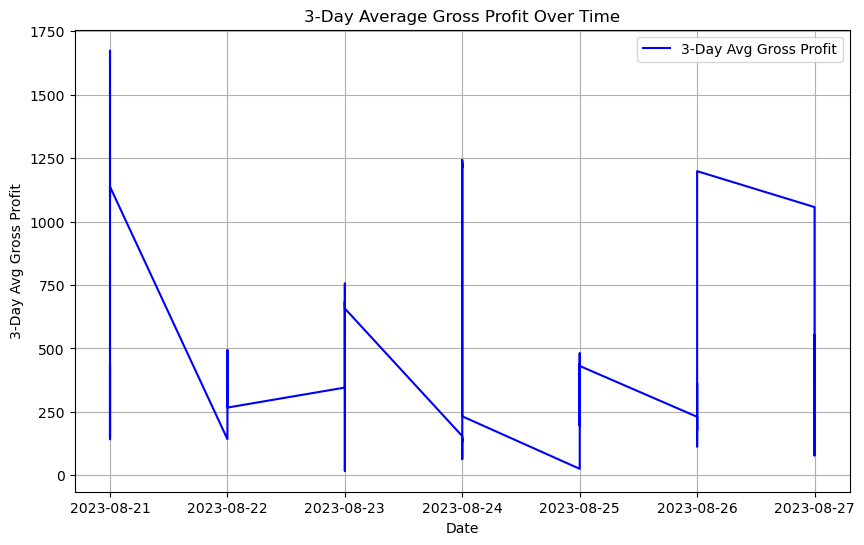

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['3-Day Avg Gross Profit'], label='3-Day Avg Gross Profit', color='blue')
plt.xlabel('Date')
plt.ylabel('3-Day Avg Gross Profit')
plt.title('3-Day Average Gross Profit Over Time')
plt.grid(True)
plt.legend()
plt.show()

From the line graph, over the week, spike in gross margin is obseved in the satrt of the week, the middle of the week and weekends. Thsi suggests that higher sales are generated on weekends maybe due to customers having free time for shopping. Based on different types of customers, the low sales may be due to most of the customers being busy on weekdays.   

# 3. Can you optimize the sales process to ensure gross margin is maximized?
    

We can perform customer segmentation by analyzing customer data to segment them based on behavior, preferences, and profitability. One way to perform customer segmentation is by clustering, we can cluster the "Buying price," "Selling price," "Quantity sold," features.

# 3.1. Would you fire any vendor?

First we must evaluate a vendor's performance based on which we can assess their creditbility to the company. Their performance can be evaluated on:
1. Gross Margin
2. Delivery Timeliness
3. Product Quality
4. Customer Satisfaction

There should be some criteria with proper reasoning for firing a vendor.
For example:
1. Failure to Meet Deadlines.
2. Lack of Communication and Responsiveness.
3. Uncompetitive Pricing.
4. Unreliable Supply Chain.

In [19]:
vendor_stats = df.groupby('Firm bought from').agg({
    'Gross Margin': 'sum',
    'Quantity bought': 'sum'
}).sort_values(by=['Gross Margin', 'Quantity bought'], ascending=[True, True])

# Get the vendor with the least gross margin 
least_gross_margin_vendor = vendor_stats['Gross Margin'].idxmin()

print(f"The vendor with the least gross margin is: {least_gross_margin_vendor}")

The vendor with the least gross margin is: Vendor6


# 3.2. Would you let go of any customer?

Similar to Vendors, a customer's performance evaluation can be done on the following:
1. Gross Margin
2. Frequency of Orders
3. Order Size

Based on the above evaluation matrices, a customer can be let go for reasons such as:
1. If a customer consistently generates low gross margins and the cost of servicing the customer outweighs the benefits.
2. If a customer makes excessive demands, requests unrealistic discounts, or expects services beyond what is feasible.
3. If a customer has a history of late payments, non-payments, or financial instability that poses a risk to your business.


In [20]:
#assuming quantity bought is quantity bought by customer
customer_stats = df.groupby('Customer').agg({
    'Gross Margin': 'sum',
    'Quantity bought': 'sum'
}).sort_values(by=['Quantity bought', 'Gross Margin'], ascending=[False, True])


least_gross_margin_high_quantity_customer = customer_stats.iloc[0]

print(f"The customer with the least gross margin and high quantity bought is: {least_gross_margin_high_quantity_customer}")

The customer with the least gross margin and high quantity bought is: Gross Margin       184.38
Quantity bought    573.00
Name: Customer8, dtype: float64


# 4. To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market. Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices? 


In [13]:
import numpy as np


buying_price_percentiles = np.percentile(df['Buying price'], [25, 50, 75])

selling_price_percentiles = np.percentile(df['Selling price'], [25, 50, 75])

print("Buying Price Percentiles:")
print(f"25th Percentile: {buying_price_percentiles[0]}")
print(f"50th Percentile (Median): {buying_price_percentiles[1]}")
print(f"75th Percentile: {buying_price_percentiles[2]}")

print("\nSelling Price Percentiles:")
print(f"25th Percentile: {selling_price_percentiles[0]}")
print(f"50th Percentile (Median): {selling_price_percentiles[1]}")
print(f"75th Percentile: {selling_price_percentiles[2]}")


Buying Price Percentiles:
25th Percentile: 29.9
50th Percentile (Median): 60.76
75th Percentile: 78.32000000000001

Selling Price Percentiles:
25th Percentile: 38.975
50th Percentile (Median): 78.99000000000001
75th Percentile: 103.39750000000001


# 5. Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.


In [14]:
buying_price_percentiles_sapota = np.percentile(df['Buying price'], [25, 75])
selling_price_percentiles_sapota = np.percentile(df['Selling price'], [25, 75])


below_25th_buying = df[df['Buying price'] < buying_price_percentiles_sapota[0]].shape[0]
above_75th_buying = df[df['Buying price'] > buying_price_percentiles_sapota[1]].shape[0]

below_25th_selling = df[df['Selling price'] < selling_price_percentiles_sapota[0]].shape[0]
above_75th_selling = df[df['Selling price'] > selling_price_percentiles_sapota[1]].shape[0]

print(f"Buying price below 25th percentile: {below_25th_buying} times")
print(f"Buying price above 75th percentile: {above_75th_buying} times")

print(f"Selling price below 25th percentile: {below_25th_selling} times")
print(f"Selling price above 75th percentile: {above_75th_selling} times")


Buying price below 25th percentile: 18 times
Buying price above 75th percentile: 18 times
Selling price below 25th percentile: 18 times
Selling price above 75th percentile: 18 times


# Ram’s manager, Bharath comes in. 

## 1. Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin? 


In [15]:
gross_margin_without_vendor4 = (df['Selling price'] - df['Buying price']).sum()

vendor4_transactions = df[df['Firm bought from'] == 'Vendor4']


total_buying_price_vendor4 = vendor4_transactions['Buying price'].sum()
total_selling_price_vendor4 = vendor4_transactions['Selling price'].sum()

gross_margin_with_vendor4 = gross_margin_without_vendor4 + (total_selling_price_vendor4 - total_buying_price_vendor4)

print(f'Optimal Gross Margin without honoring Vendor 4: {gross_margin_without_vendor4}')
print(f'Optimal Gross Margin with honoring Vendor 4: {gross_margin_with_vendor4}')


impact_on_gross_margin = gross_margin_with_vendor4 - gross_margin_without_vendor4
print(f'Impact on Gross Margin by honoring Vendor 4: {impact_on_gross_margin}')

Optimal Gross Margin without honoring Vendor 4: 1207.1999999999998
Optimal Gross Margin with honoring Vendor 4: 1377.3099999999997
Impact on Gross Margin by honoring Vendor 4: 170.1099999999999


our gross margin increases by 170 in gross margin in the scenario that Vendor 4 is honored.

## 2. Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin)
    - What’s the theoretical max margin the firm could have from that branch? 

In [16]:
df['Gross Margin'] = df['Selling price'] - df['Buying price']
vendor_gross_margin = df.groupby('Firm bought from')['Gross Margin'].sum()

# Identifyying most profitable vendor
most_profitable_vendor = vendor_gross_margin.idxmax()
max_margin = vendor_gross_margin.max()

print(f"The most profitable vendor is: {most_profitable_vendor}")
print(f"Theoretical maximum gross margin from {most_profitable_vendor}: {max_margin}")


The most profitable vendor is: Vendor7
Theoretical maximum gross margin from Vendor7: 224.98
